# Debug NMF on Tara

In [32]:
# imports

from importlib import reload

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from datetime import datetime, time
import random 

import pandas
import seaborn as sns

from oceancolor.tara import io as tara_io
from oceancolor.tara import spectra as tara_spectra
from oceancolor.ph import pigments

from cnmf.oceanography import iops
from cnmf import zhu_nmf as nmf
from cnmf import io as cnmf_io

In [2]:
%matplotlib ipympl

# Load

In [25]:
tara_db = tara_io.load_pg_db(expedition='Microbiome')

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/io.py:59: UserWarning: Duplicate times in Tara Oceans database
  warnings.warn("Duplicate times in Tara Oceans database")


## Load up the NMF fit

In [17]:
N_NMF, iop = 4, 'a'
# Load Tara
d_tara = cnmf_io.load_nmf('Tara', N_NMF, iop)
M_tara = d_tara['M']
wave_tara = d_tara['wave']
w_tara = d_tara['coeff']
UID = d_tara['UID']

In [18]:
list(d_tara.keys())

['M', 'coeff', 'spec', 'mask', 'err', 'wave', 'Rs', 'UID']

In [19]:
spec_tara = d_tara['spec']
spec_tara.shape

(215681, 59)

# Plot the Ms

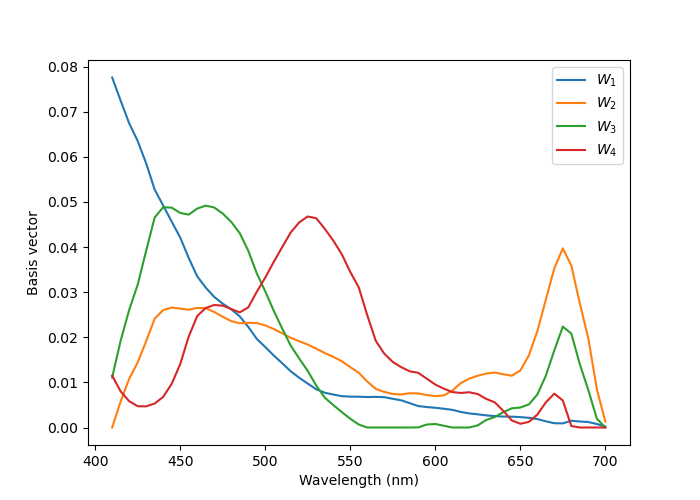

In [20]:
#
M = M_tara
wave = wave_tara
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(M.shape[0]):
    ax.plot(wave,M[ss], label=r'$W_'+f'{ss+1}'+'$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()

# Examine one with a high $w_1$

In [21]:
w_tara.shape

(215681, 4)

In [22]:
iw1_max = np.argmax(w_tara[:,0])
w_tara[iw1_max]

array([3.64285295e+01, 2.79453242e-49, 2.81833851e-14, 4.11824173e+00])

## Plot me

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


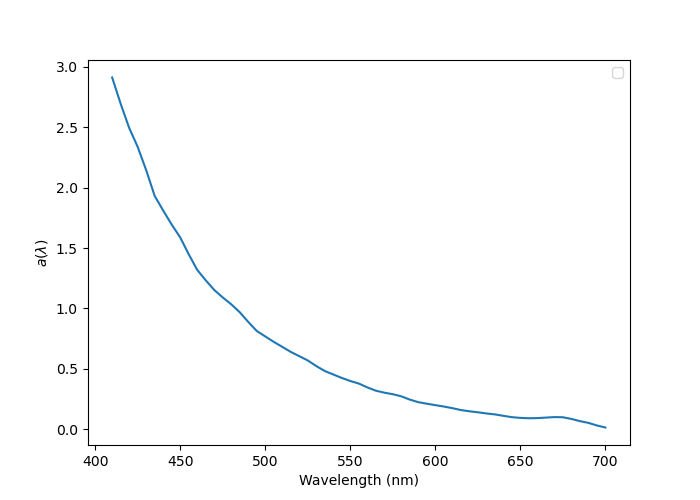

In [23]:
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
ax.plot(wave_tara, spec_tara[iw1_max])
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a(\lambda)$')
ax.legend()
#
plt.show()

## Which one is it?

In [24]:
uid_w1max = UID[iw1_max]
uid_w1max

1656831360000000000

In [28]:
idb = np.where(tara_db.UID == uid_w1max)[0][0]
idb

308063

In [31]:
tdb_w1max = tara_db.iloc[idb]
tdb_w1max

dt                                         03-Jul-2022 06:56:00
lat                                                   -6.138023
lon                                                   12.152861
t                                                     23.593683
s                                                     27.302667
                                    ...                        
hbb_bbp_26                                             0.003614
hbb_bbp_27                                             0.003627
hbb_bbp_28                                             0.003337
geometry      b'\x01\x01\x00\x00\x00\xfc\x02p\xc6CN(@\nS\xef...
UID                                         1656831360000000000
Name: 2022-07-03 06:56:00, Length: 392, dtype: object

## Examine further

## Check the spectrum

In [34]:
wv, keys = tara_spectra.parse_wavelengths(tdb_w1max)
keys

array(['ap408.5', 'ap411.9', 'ap415.3', 'ap419.2', 'ap423.5', 'ap427.6',
       'ap431.5', 'ap435.7', 'ap439.3', 'ap443.5', 'ap447.9', 'ap452.7',
       'ap457.1', 'ap461', 'ap465.4', 'ap469.8', 'ap474.3', 'ap479',
       'ap483.8', 'ap488.1', 'ap492.3', 'ap496.5', 'ap500.8', 'ap505.4',
       'ap509.9', 'ap514.7', 'ap519', 'ap523.7', 'ap528', 'ap532',
       'ap536.1', 'ap540.4', 'ap544.5', 'ap549.2', 'ap553.3', 'ap557.5',
       'ap561.6', 'ap565.9', 'ap570', 'ap573.7', 'ap577.5', 'ap582.5',
       'ap586.6', 'ap590.7', 'ap594.9', 'ap599.3', 'ap603.6', 'ap608',
       'ap612.3', 'ap616.9', 'ap621.2', 'ap625.5', 'ap629.7', 'ap633.9',
       'ap638.2', 'ap642.3', 'ap646.6', 'ap650.9', 'ap655.5', 'ap659.8',
       'ap664.1', 'ap668.5', 'ap672.6', 'ap676.8', 'ap680.9', 'ap685',
       'ap689', 'ap692.9', 'ap696.6', 'ap700.5', 'ap704.2', 'ap707.9',
       'ap712', 'ap715.5', 'ap719.3', 'ap723', 'ap726.7', 'ap730'],
      dtype='<U7')

In [35]:
spec = []
for key in keys:
    spec.append(tdb_w1max[key])
spec = np.array(spec)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


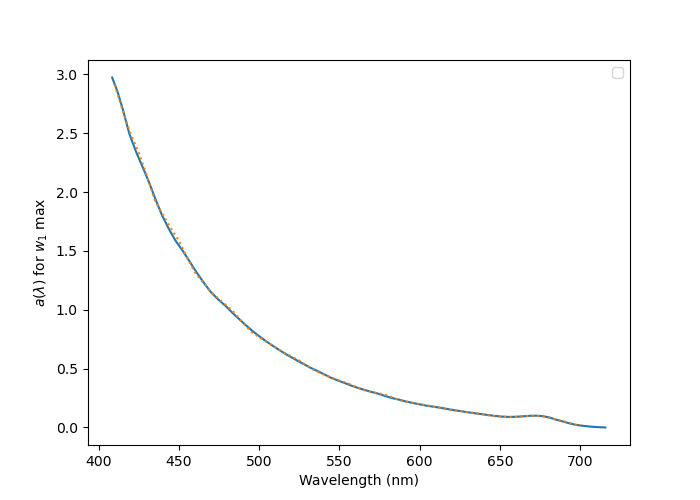

In [37]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
ax.plot(wv, spec)
ax.plot(wave_tara, spec_tara[iw1_max], ':')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a(\lambda)$ for $w_1$ max')
ax.legend()
#
plt.show()